<a href="https://colab.research.google.com/github/estebanhernandezr/Entregas-Semanales/blob/main/AndreyEsteban_LizarazoHernandez_ejerciciosCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación, **importamos** las **librerías** necesarias...

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

A continuación, **importamos** el **dataset iris**, los **regresores** y el **target** en dataframes por separado y luego los **concatenamos** en un solo **dataframe**...

In [20]:
# Dataset IRIS
iris = datasets.load_iris()
# Regresores
df_observ = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Target (0=setosa, 1=versicolor, 2=virginica)
df_target = pd.DataFrame(data=iris.target, columns=['label'])
df_target['name'] = df_target['label'].apply(lambda x: iris.target_names[x])
# Dataframe completo (regresores junto a su etiqueta correspondiente)
df_comple = pd.concat([df_observ, df_target], axis=1)
df_comple

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Tenemos un **dataframe** compuesto por **150 observaciones** de **4 características** y **una etiqueta** (**label** + **name**). Cuando graficamos dos de las características (**petal length** y **petal width**), podemos ver cómo se separan los datos en las **3 clases** distintas: **setosa**, **versicolor** y **virginica**.

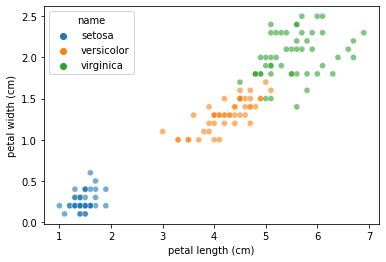

In [19]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='name', data=df_comple, alpha=0.6);

A continuación, podemos ver la **proyección** de los datos sobre el **eje y**.

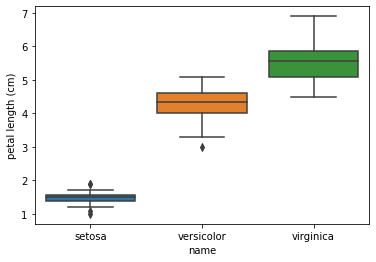

In [24]:
sns.boxplot(y='petal length (cm)', x='name',data=df_comple);

A continuación, podemos ver la **proyección** de los datos sobre el **eje x**.

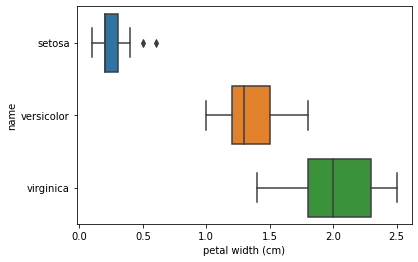

In [26]:
sns.boxplot(x='petal width (cm)', y='name',data=df_comple);

Podemos comprobar cómo las características **petal width** y **petal length** separan satisfactoriamente las 3 clases: sus medias están separadas y sus variaciones son lo suficientemente pequeñas que no se sobrelapan demasiado. 

Debido a que las clases se separan lo suficientemente bien con las dos características **petal width** y **petal length**, usaremos solo estas dos para entrenar tres modelos diferentes: **KNN**, **Regresión Logistica** y **K-means**.

A continuación, separamos el dataframe en **datos de prueba** y **datos de entrenamiento**.

In [35]:
# Dataframe con columnas "petal width" y "petal length" de 150 observaciones
X = df_observ.iloc[:, 2:]
# Dataframe columna "label" de 150 observaciones
y = df_target.iloc[:, 0]
# Separación de los datos en datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)